# Inicialización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos de MNIST de moda (Fashion MNIST)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_test[0:20]
#primera aparicion de cada clase (9,0)(2,1)(1,2)(6,4)(4,6)(5,8)(7,9)(3,13)(8,19)(0,20)
tshirt=x_test[19]
trouser=x_test[2]
pullover=x_test[1]
dress=x_test[13]
coat=x_test[6]
sandal=x_test[8]
shirt=x_test[4]
sneaker=x_test[9]
bag=x_test[18]
ankleboot=x_test[0]

# Normalizar los valores de píxeles al rango [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0




# Redefinir las etiquetas de clase
clases_ropa = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Creamos el modelo de detección de tipos de ropa
def crear_modelo(input_shape, hidden_dim, optimizer):
    modelo = keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(hidden_dim, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    modelo.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return modelo

# Definimos los hiperparámetros
input_shape = (28, 28)  # Tamaño de la imagen de entrada
hidden_dim = 128
epochs = 10
batch_size = 64

# Definimos los valores a probar para los hiperparámetros
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
momentums = [0.0, 0.5, 0.9, 0.99, 0.999]
betas_1 = [0.1, 0.7, 0.9]
betas_2 = [0.9,0.95,0.99]
decay_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
dummy_array = [0]

# Definimos los optimizadores
optimizers = {
    "SGD": {(lr, momentum, nesterov): keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov)
          for lr in learning_rates
           for momentum in momentums
            for nesterov in [True, False]},
    "Adagrad": { (lr,dummy): keras.optimizers.Adagrad(learning_rate=lr)
                 for lr in learning_rates
                 for dummy in dummy_array},
    "Adadelta": {(lr, decay_rate): keras.optimizers.Adadelta(learning_rate=lr, rho=decay_rate)
                 for lr in learning_rates
                 for decay_rate in decay_rates},
    "RMSprop": {(lr, decay_rate): keras.optimizers.RMSprop(learning_rate=lr, rho=decay_rate)
                for lr in learning_rates
                for decay_rate in decay_rates},
    "Adam": {(lr, beta1,beta2): keras.optimizers.Adam(learning_rate=lr, beta_1=beta1, beta_2=beta2)
             for lr in learning_rates
             for beta1 in betas_1
             for beta2 in betas_2},
    "Nadam": {(lr, beta1,beta2): keras.optimizers.Nadam(learning_rate=lr, beta_1=beta1, beta_2=beta2)
              for lr in learning_rates
              for beta1 in betas_1
              for beta2 in betas_2}
}



In [12]:
clases_ropa = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [61]:
def addlabels(x,y):
  active_label = x.copy()
  for i in range(len(x)):
    if round(y[i]*100,2) > 80:
      plt.text(i, y[i]-0.1, round(y[i]*100,2), ha = 'center',fontsize=8)
    elif round(y[i]*100,2) > 0.0001:
      plt.text(i, y[i], round(y[i]*100,2), ha = 'center',fontsize=8)
    else:
      active_label[i] = ""
  return active_label

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clases_ropa[predicted_label],
                                100*np.max(predictions_array),
                                clases_ropa[true_label]),
                                color=color)

def plot_bars_graph(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  clases_likehood =  addlabels(clases_ropa,predictions_array)
  plt.xticks(np.arange(len(clases_ropa)),clases_likehood)
  plt.xticks(rotation=45,fontsize=8)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777", width=1.5)
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  addlabels(clases_ropa,predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

def plot_multiple_evaluation(X_test, y_test, y_hat,num_rows=6, num_cols=2,indexes=[19,2,1,13,8,4,12,18,0,74,29,89]):
  num_images = num_rows*num_cols
  fig = plt.figure(figsize=(2*2*2*num_cols, 2*num_rows+num_rows))
  fig.tight_layout(h_pad=15)
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(indexes[i], y_hat, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_bars_graph(indexes[i], y_hat,  y_test)
  plt.savefig("drive/MyDrive/TFGMat/fashion_predictions/"+title.replace(":","_").replace(".","")+".pdf")
  plt.show()

#Prueba corta

In [20]:
modelo = keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(hidden_dim, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
modelo.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = modelo.fit(x_train, y_train, epochs=epochs, batch_size=128, verbose=0, validation_split=0.2)
test_loss, test_accuracy = modelo.evaluate(x_test, y_test, verbose=0)

resultados=[]
min_loss = np.min(history.history['loss'])
resultados.append(["SGD" ,*(0.01,0.5,True), 64, min_loss, test_loss])

predictions = modelo.predict(x_test)
print("predictions shape:", predictions.shape)

313/313 [==============================] - 1s 2ms/step
predictions shape: (10000, 10)


In [6]:
y_test[0:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

In [10]:
print(predictions[0:20])

[[1.66135487e-05 1.72268642e-06 5.41716236e-06 1.38330770e-05
  6.92253980e-06 8.94014388e-02 4.54638794e-05 1.47422716e-01
  2.86560226e-03 7.60220230e-01]
 [1.62255528e-04 1.70546900e-06 9.07279134e-01 8.73881982e-06
  6.68098778e-03 3.04821079e-09 8.58337432e-02 1.30291680e-10
  3.34521646e-05 8.25928423e-11]
 [2.33531591e-05 9.99917448e-01 1.04851861e-05 1.37654406e-05
  3.40623519e-05 9.38059963e-10 9.60416315e-08 1.02280453e-07
  6.99240047e-07 4.07326062e-10]
 [1.58654238e-05 9.99635100e-01 1.99007245e-05 2.63232127e-04
  6.36251934e-05 7.43430135e-08 4.80854737e-07 7.63051673e-07
  8.53674806e-07 1.10657773e-07]
 [8.72122049e-02 7.81460432e-04 8.87392536e-02 8.46244860e-03
  1.33918114e-02 3.16639707e-05 7.97627270e-01 2.71201861e-06
  3.71727883e-03 3.38666796e-05]
 [5.06847771e-03 9.88163888e-01 9.76497191e-04 6.03121880e-04
  4.91420971e-03 4.73959965e-08 1.67752019e-04 2.49536765e-06
  1.03530532e-04 2.12830109e-08]
 [8.57736915e-03 4.20618133e-04 7.62366317e-03 1.14417670e

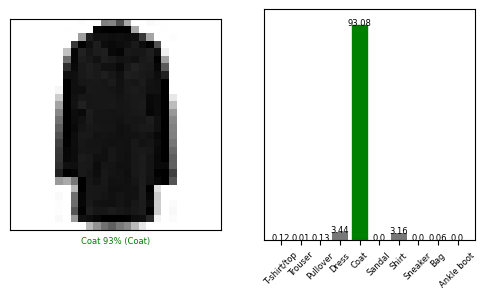

In [38]:
i = 1400 #1100
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  y_test)
i=i+1

# Quick setup

In [3]:
#Test
learning_rates = [1, 0.1]
momentums = [0.0, 0.9]
betas_1 = [0.1, 0.9]
betas_2 = [0.9, 0.99]
decay_rates = [0.1, 0.9]
dummy_array = [0]

optimizers = {
    "SGD": {(lr, momentum, nesterov): keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov)
          for lr in learning_rates
           for momentum in momentums
            for nesterov in [True, False]},
    "Adagrad": { (lr,dummy): keras.optimizers.Adagrad(learning_rate=lr)
                 for lr in learning_rates
                 for dummy in dummy_array},
    "Adadelta": {(lr, decay_rate): keras.optimizers.Adadelta(learning_rate=lr, rho=decay_rate)
                 for lr in learning_rates
                 for decay_rate in decay_rates},
    "RMSprop": {(lr, decay_rate): keras.optimizers.RMSprop(learning_rate=lr, rho=decay_rate)
                for lr in learning_rates
                for decay_rate in decay_rates},
    "Adam": {(lr, beta1,beta2): keras.optimizers.Adam(learning_rate=lr, beta_1=beta1, beta_2=beta2)
             for lr in learning_rates
             for beta1 in betas_1
             for beta2 in betas_2},
    "Nadam": {(lr, beta1,beta2): keras.optimizers.Nadam(learning_rate=lr, beta_1=beta1, beta_2=beta2)
              for lr in learning_rates
              for beta1 in betas_1
              for beta2 in betas_2}
}


# Entrenando y validando

In [3]:
# Crear tabla con los resultados
resultados = []
modeloPredict=[]
modelos = []
best_models=[]
j=0;
for optimizer_name, optimizer_dict in optimizers.items():
    current_best_model = None
    current_best_model_mom = None
    current_best_model_nest = None
    current_min_loss = 0
    for params, optimizer in optimizer_dict.items():
        lr=0
        if optimizer_name == "SGD":
            lr, momentum, nesterov = params
            print(f"Entrenando con {optimizer_name}, batch={batch_size} y lr={lr}, momentum={momentum}, nesterov={nesterov}")
        elif optimizer_name in ["Adadelta", "RMSprop"]:
            lr, decay_rate = params
            print(f"Entrenando con {optimizer_name}, batch={batch_size} y lr={lr}, decay_rate={decay_rate}")
        elif optimizer_name in ["Adam", "Nadam"]:
            lr, beta1, beta2 = params
            print(f"Entrenando con {optimizer_name}, batch={batch_size} y lr={lr}, beta1={beta1}, beta2={beta2}")
        else:
            lr, dummy = params
            print(f"Entrenando con {optimizer_name}, batch={batch_size} y lr={lr}")

        if lr!=1 or (lr==1 and optimizer_name=="Adadelta"):
          current_model=crear_modelo(input_shape, hidden_dim, optimizer)
          history = current_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

          # Simulación de prueba
          test_loss, test_accuracy = current_model.evaluate(x_test, y_test, verbose=0)
          print(f"Pérdida en el conjunto de prueba: {test_loss}, Precisión en el conjunto de prueba: {test_accuracy}")

          # Obtener la mejor pérdida y los parámetros correspondientes
          min_loss = np.min(history.history['loss'])
          if optimizer_name in ["Adadelta", "RMSprop"]:
            resultados.append([optimizer_name ,*params,"N/A", min_loss, test_loss, test_accuracy])
          elif optimizer_name == "Adagrad":
            resultados.append([optimizer_name,lr,"N/A" ,"N/A", min_loss, test_loss,test_accuracy])
          else:
            resultados.append([optimizer_name ,*params, min_loss, test_loss,test_accuracy])
          #saving all results
          modelos.append(current_model)
          if optimizer_name != "SGD":
            if current_best_model is None:
              current_best_model = j
              current_min_loss = min_loss
            elif min_loss < current_min_loss:
              current_best_model = j
              current_min_loss = min_loss
          else:
            if nesterov:
              if current_best_model_nest is None:
                current_best_model_nest = j
                current_min_loss = min_loss
              elif min_loss < current_min_loss:
                current_best_model_nest = j
                current_min_loss = min_loss
            elif momentum != 0:
              if current_best_model_mom is None:
                current_best_model_mom = j
                current_min_loss = min_loss
              elif min_loss < current_min_loss:
                current_best_model_mom = j
                current_min_loss = min_loss
            else:
              if current_best_model is None:
                current_best_model = j
                current_min_loss = min_loss
              elif min_loss < current_min_loss:
                current_best_model = j
                current_min_loss = min_loss
          j=j+1
    print("Ending optimizer " + optimizer_name)
    #elegir mejor resultado
    if optimizer_name == "SGD":
      best_models.append(["Nesterov",current_best_model_nest])
      best_models.append(["Momentum",current_best_model_mom])
    best_models.append([optimizer_name,current_best_model])

Entrenando con SGD, batch=64 y lr=1, momentum=0.0, nesterov=True
Entrenando con SGD, batch=64 y lr=1, momentum=0.0, nesterov=False
Entrenando con SGD, batch=64 y lr=1, momentum=0.5, nesterov=True
Entrenando con SGD, batch=64 y lr=1, momentum=0.5, nesterov=False
Entrenando con SGD, batch=64 y lr=1, momentum=0.9, nesterov=True
Entrenando con SGD, batch=64 y lr=1, momentum=0.9, nesterov=False
Entrenando con SGD, batch=64 y lr=1, momentum=0.99, nesterov=True
Entrenando con SGD, batch=64 y lr=1, momentum=0.99, nesterov=False
Entrenando con SGD, batch=64 y lr=1, momentum=0.999, nesterov=True
Entrenando con SGD, batch=64 y lr=1, momentum=0.999, nesterov=False
Entrenando con SGD, batch=64 y lr=0.1, momentum=0.0, nesterov=True
Pérdida en el conjunto de prueba: 0.39097777009010315, Precisión en el conjunto de prueba: 0.8597000241279602
Entrenando con SGD, batch=64 y lr=0.1, momentum=0.0, nesterov=False
Pérdida en el conjunto de prueba: 0.3571767508983612, Precisión en el conjunto de prueba: 0.87

# Extracción

Sacando datos

In [63]:
# Ordenar resultados por test_loss
resultados.sort(key=lambda x: x[5])

# Imprimir tabla
print(tabulate(resultados, headers=["Optimizador", "Learning Rate", "Momentum/Beta/Decay Rate", "Nesterov/Beta_2", "Resultado de pérdida","Pérdida en test", "Precisión en test"], tablefmt="pretty"))

# Obtener índice de la fila con la menor pérdida en test
best_test_loss_index = resultados[0][0]

+-------------+---------------+--------------------------+-----------------+----------------------+---------------------+---------------------+
| Optimizador | Learning Rate | Momentum/Beta/Decay Rate | Nesterov/Beta_2 | Resultado de pérdida |   Pérdida en test   |  Precisión en test  |
+-------------+---------------+--------------------------+-----------------+----------------------+---------------------+---------------------+
|    Adam     |     0.001     |           0.1            |      0.99       | 0.24430528283119202  | 0.3366566598415375  |  0.882099986076355  |
|    Nadam    |     0.001     |           0.7            |      0.95       | 0.24714304506778717  | 0.3445269465446472  |  0.880299985408783  |
|    Nadam    |     0.001     |           0.9            |      0.99       | 0.24586737155914307  |   0.3460713326931   | 0.8794000148773193  |
|    Adam     |     0.001     |           0.7            |      0.95       | 0.24481430649757385  | 0.34764981269836426 | 0.882200002670

# latex


In [5]:
resultados[8]

['SGD',
 0.1,
 0.999,
 True,
 2.048994541168213,
 2.3461787700653076,
 0.10000000149011612]

In [64]:
tabulate.LATEX_ESCAPE_RULES = {}
print(tabulate(resultados, headers=["Optimizador", "Learning Rate", "Momentum/Beta/Decay Rate", "Nesterov/Beta_2", "Menor pérdida", "Pérdida en test","Precisión en test"], tablefmt="latex",floatfmt=".6f"))

\begin{tabular}{lrllrrr}
\hline
 Optimizador   &   Learning Rate & Momentum/Beta/Decay Rate   & Nesterov/Beta\_2   &   Menor pérdida &   Pérdida en test &   Precisión en test \\
\hline
 Adam          &        0.001000 & 0.1                        & 0.99              &        0.244305 &          0.336657 &            0.882100 \\
 Nadam         &        0.001000 & 0.7                        & 0.95              &        0.247143 &          0.344527 &            0.880300 \\
 Nadam         &        0.001000 & 0.9                        & 0.99              &        0.245867 &          0.346071 &            0.879400 \\
 Adam          &        0.001000 & 0.7                        & 0.95              &        0.244814 &          0.347650 &            0.882200 \\
 SGD           &        0.100000 & 0.5                        & False             &        0.270678 &          0.347673 &            0.877300 \\
 Adam          &        0.001000 & 0.9                        & 0.99              &       

# Pruebas de grafica

In [11]:
for optimizer_name, optimizer_dict in optimizers.items():
  for params, optimizer in optimizer_dict.items():
    for item in resultados:
      if item[0] == optimizer_name and item[1] == params[0] and item[2]==params[1]:
          print(item[-1])

0.3635402023792267
0.3529299795627594
0.3635402023792267
0.3529299795627594
0.3763691782951355
0.35941922664642334
0.3763691782951355
0.35941922664642334
0.42183515429496765
0.5138790011405945
0.42183515429496765
0.5138790011405945
2.1645455360412598
2.337512254714966
2.1645455360412598
2.337512254714966
2.3348047733306885
2.6897387504577637
2.3348047733306885
2.6897387504577637
0.4610157310962677
0.4671061038970947
0.4610157310962677
0.4671061038970947
0.42540961503982544
0.4236595630645752
0.42540961503982544
0.4236595630645752
0.3623417615890503
0.38880279660224915
0.3623417615890503
0.38880279660224915
0.4247972071170807
0.504738450050354
0.4247972071170807
0.504738450050354
2.0721776485443115
2.2528398036956787
2.0721776485443115
2.2528398036956787
0.6883331537246704
0.690599799156189
0.6883331537246704
0.690599799156189
0.5812028646469116
0.5926200747489929
0.5812028646469116
0.5926200747489929
0.46084335446357727
0.4627799689769745
0.46084335446357727
0.4627799689769745
0.362261

In [12]:
# Graficar loss function
plt.figure(figsize=(10,6))
for optimizer_name, optimizer_dict in optimizers.items():
  for params, optimizer in optimizer_dict.items():
    for item in resultados:
      loss = [item[-1] for item in resultados if item[0] == optimizer_name and item[1] == params[0] and item[2]==params[1]][0]
    label = f'{optimizer_name} lr={params[0]}'
    if optimizer_name == "SGD":
      label += f", momentum={params[1]}, nesterov={params[2]}"
    elif optimizer_name in ["Adadelta", "RMSprop"]:
      label += f", decay_rate={params[1]}"
    elif optimizer_name in ["Adam", "Nadam"]:
      label += f", beta={params[1]}"
    if (optimizer_name, *params) == best_test_loss_index:
      plt.plot(loss, label=label, color='green')
    else:
      plt.plot(loss, label=label)

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss Function')
  plt.legend(loc='upper right')
  plt.show()

IndexError: list index out of range

<Figure size 1000x600 with 0 Axes>

# Comparativa

Se comparan los datos con los datos de los mejores modelos entrenados.

{'module': 'keras.optimizers.experimental', 'class_name': 'SGD', 'config': {'name': 'SGD', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.10000000149011612, 'momentum': 0.5, 'nesterov': True}, 'registered_name': None}
4/4 [==============================] - 0s 3ms/step


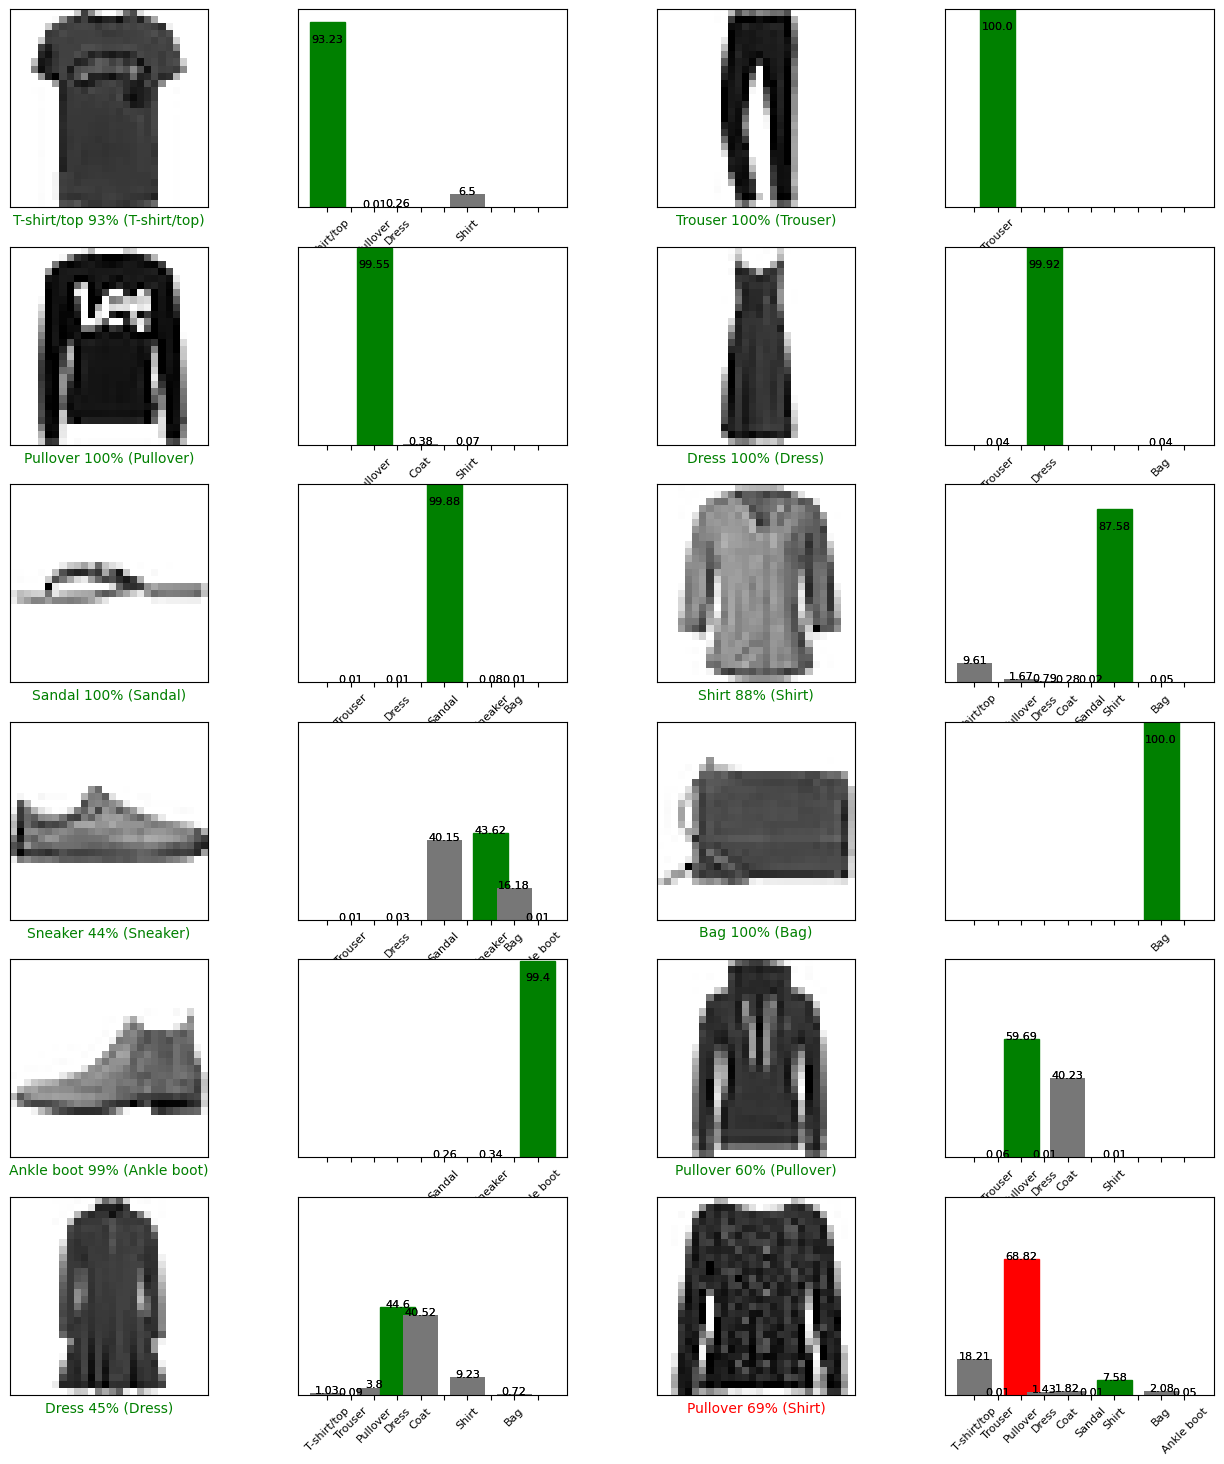

 
{'module': 'keras.optimizers.experimental', 'class_name': 'SGD', 'config': {'name': 'SGD', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.10000000149011612, 'momentum': 0.5, 'nesterov': False}, 'registered_name': None}
4/4 [==============================] - 0s 4ms/step


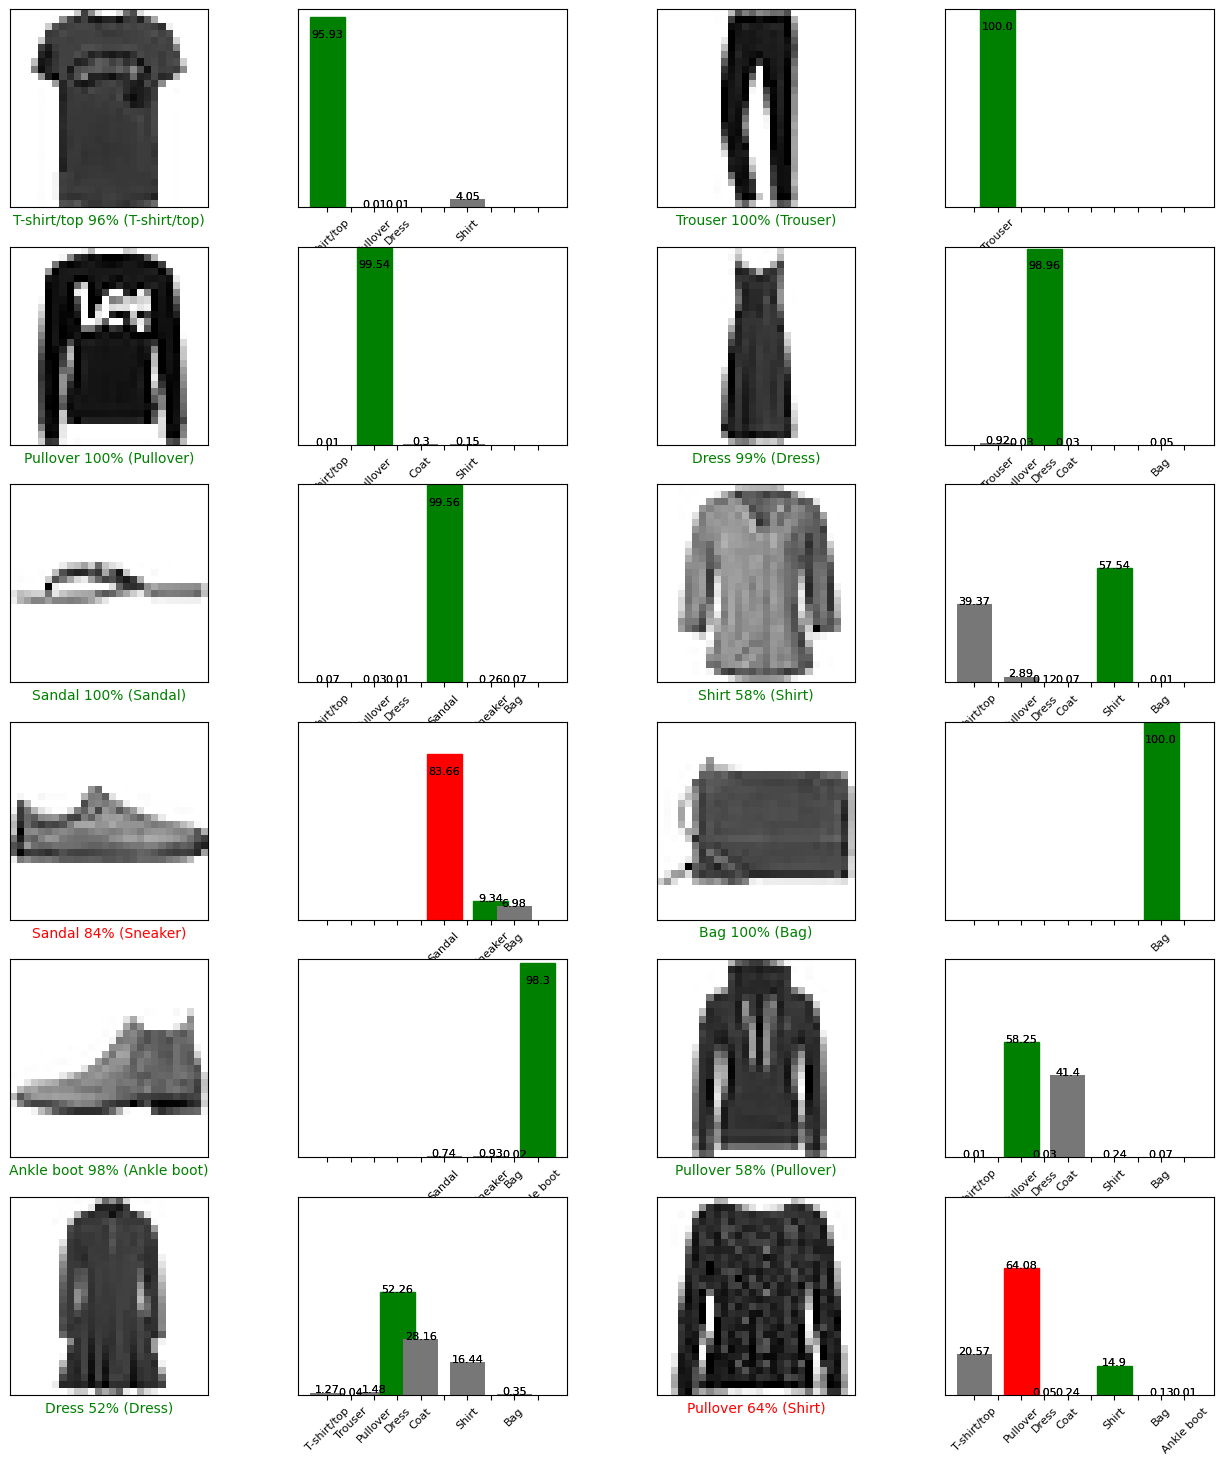

 
{'module': 'keras.optimizers.experimental', 'class_name': 'SGD', 'config': {'name': 'SGD', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.10000000149011612, 'momentum': 0.0, 'nesterov': False}, 'registered_name': None}
4/4 [==============================] - 0s 4ms/step


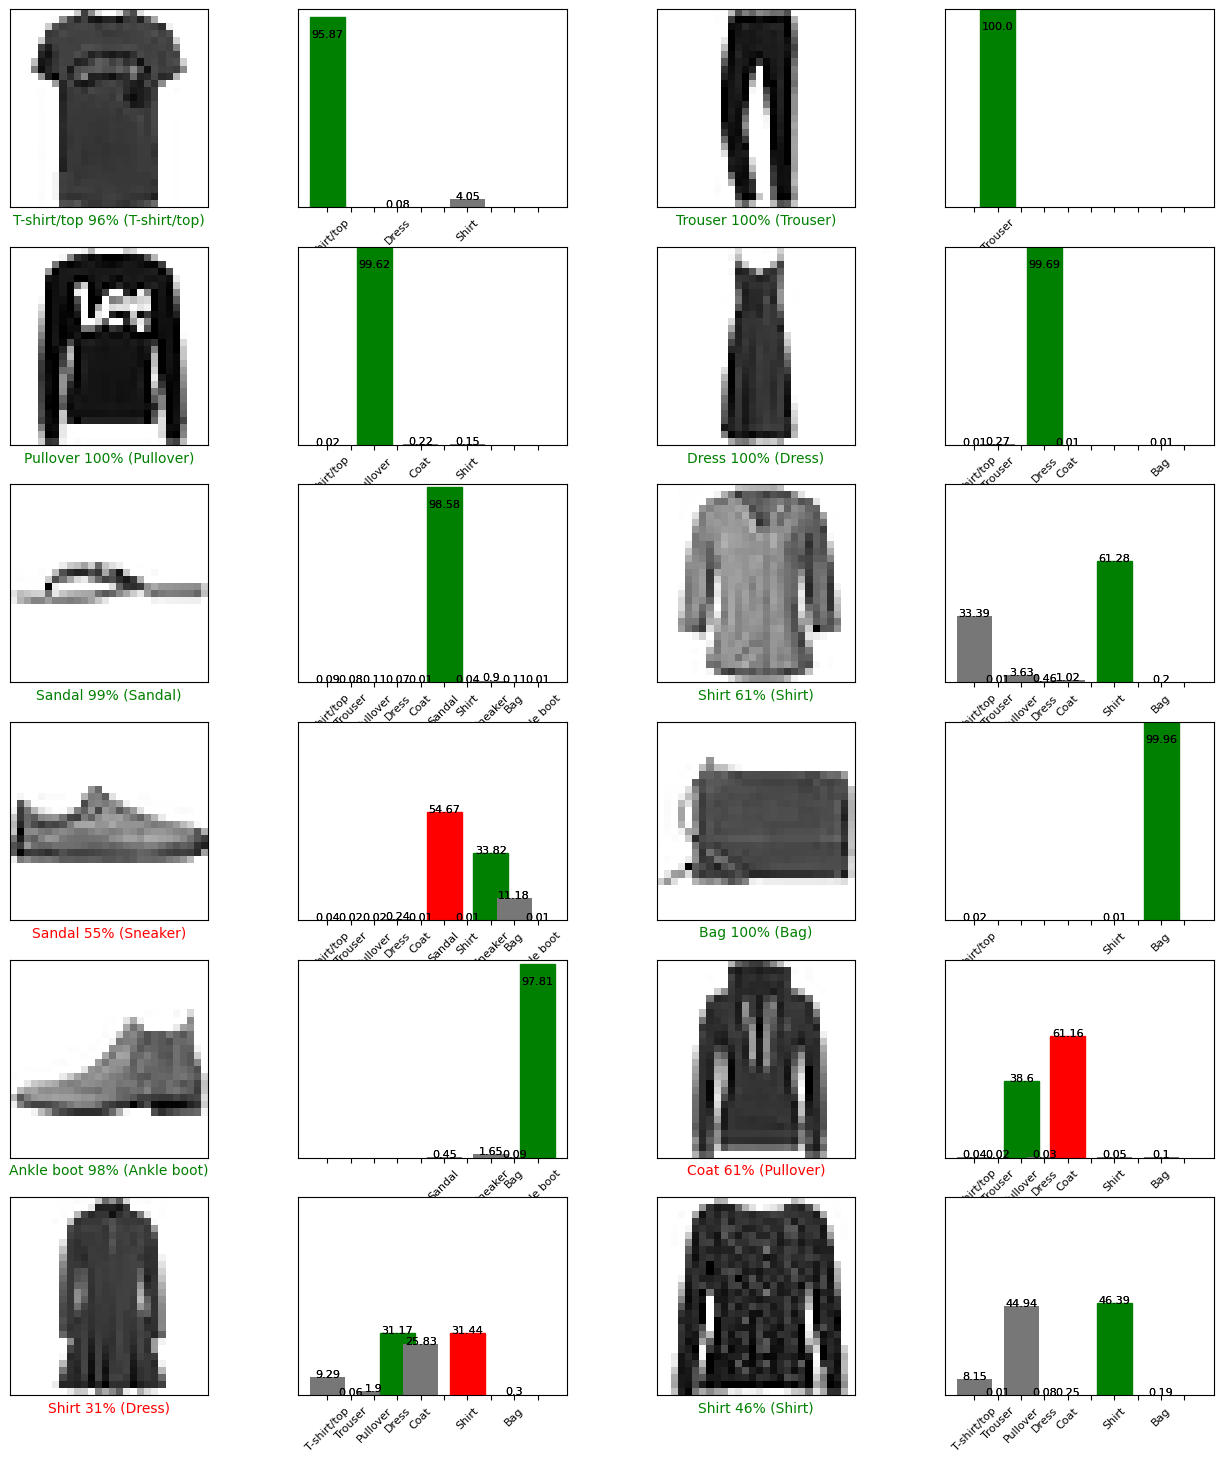

 
{'module': 'keras.optimizers.experimental', 'class_name': 'Adagrad', 'config': {'name': 'Adagrad', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.10000000149011612, 'initial_accumulator_value': 0.1, 'epsilon': 1e-07}, 'registered_name': None}
4/4 [==============================] - 0s 5ms/step


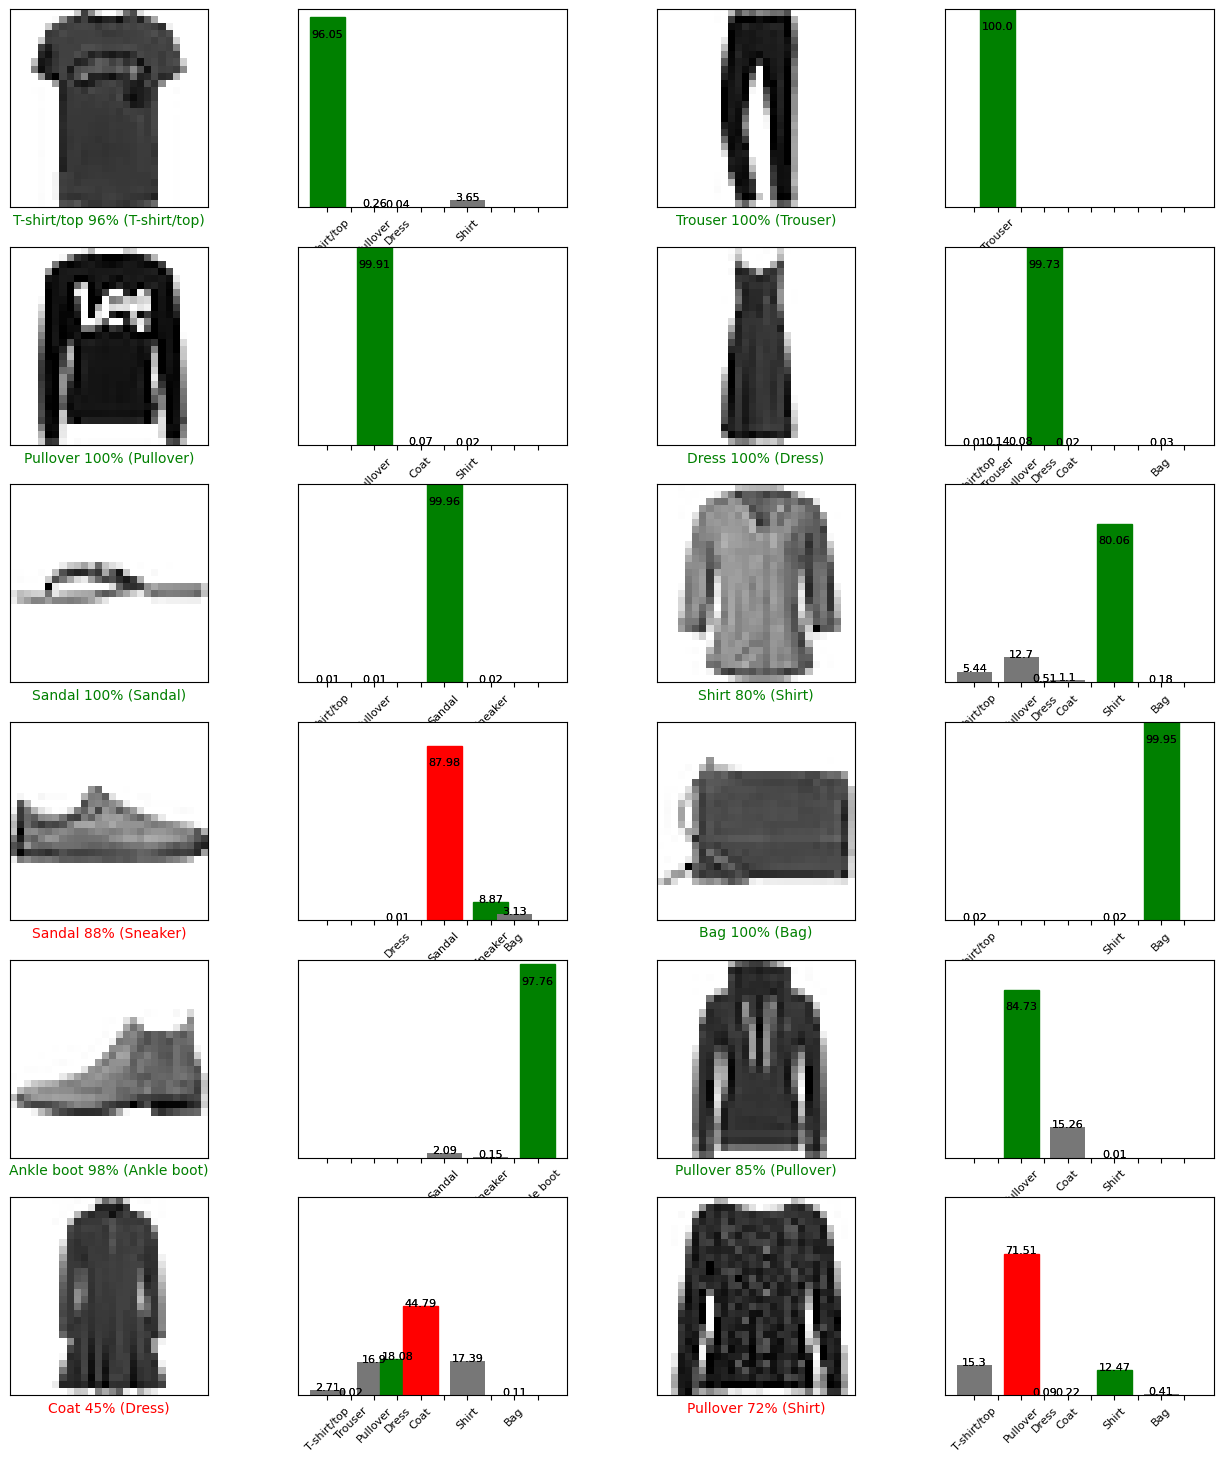

 
{'module': 'keras.optimizers.experimental', 'class_name': 'Adadelta', 'config': {'name': 'Adadelta', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 1.0, 'rho': 0.9, 'epsilon': 1e-07}, 'registered_name': None}
4/4 [==============================] - 0s 4ms/step


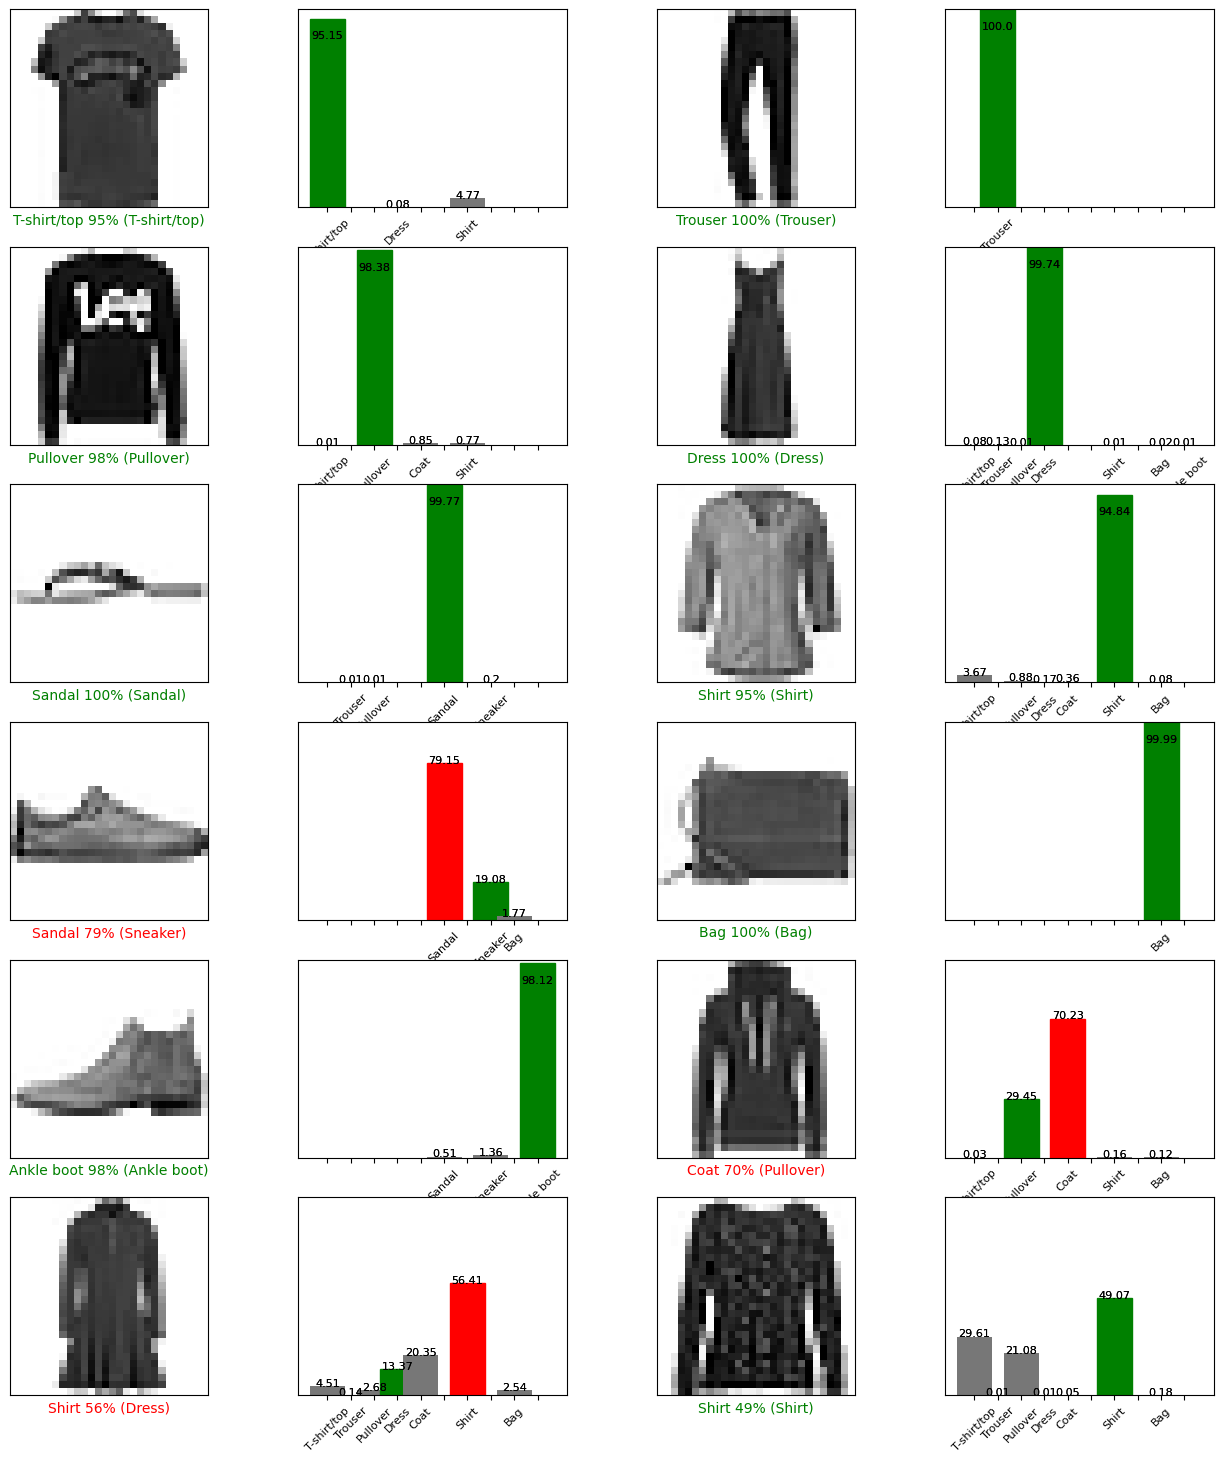

 
{'module': 'keras.optimizers.experimental', 'class_name': 'RMSprop', 'config': {'name': 'RMSprop', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': 100, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.0010000000474974513, 'rho': 0.9, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'registered_name': None}
4/4 [==============================] - 0s 4ms/step


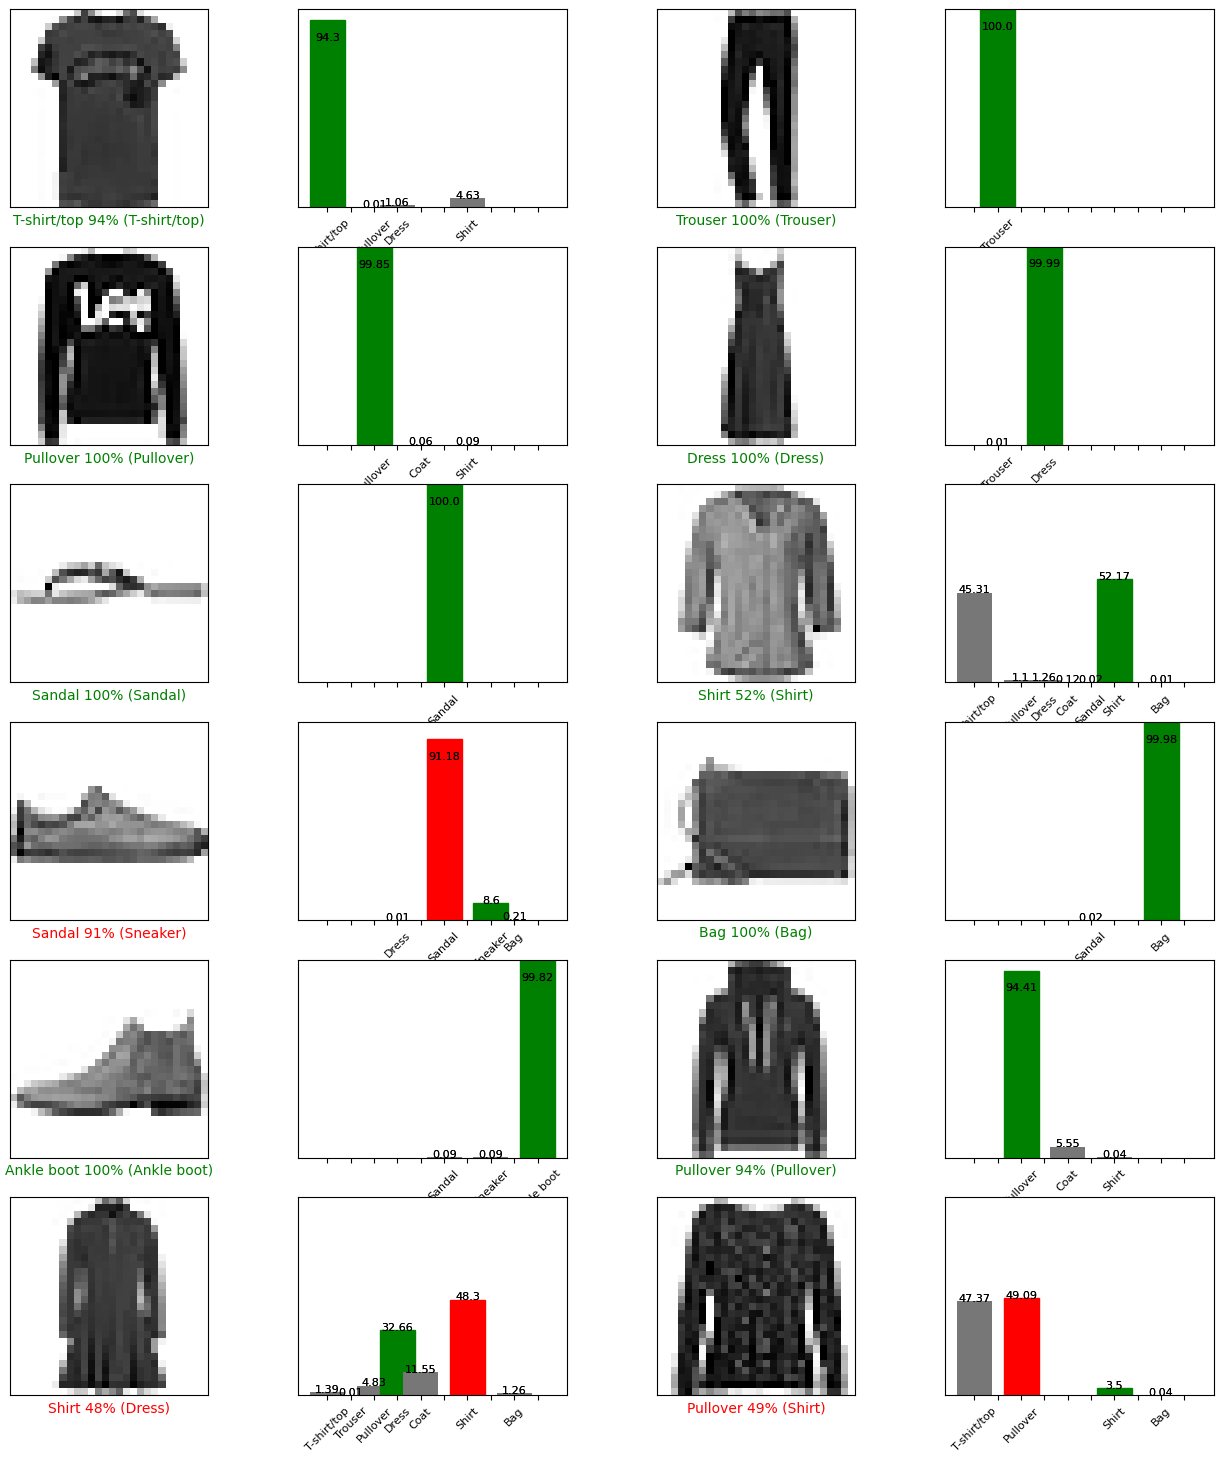

 
{'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.0010000000474974513, 'beta_1': 0.1, 'beta_2': 0.99, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}
4/4 [==============================] - 0s 5ms/step


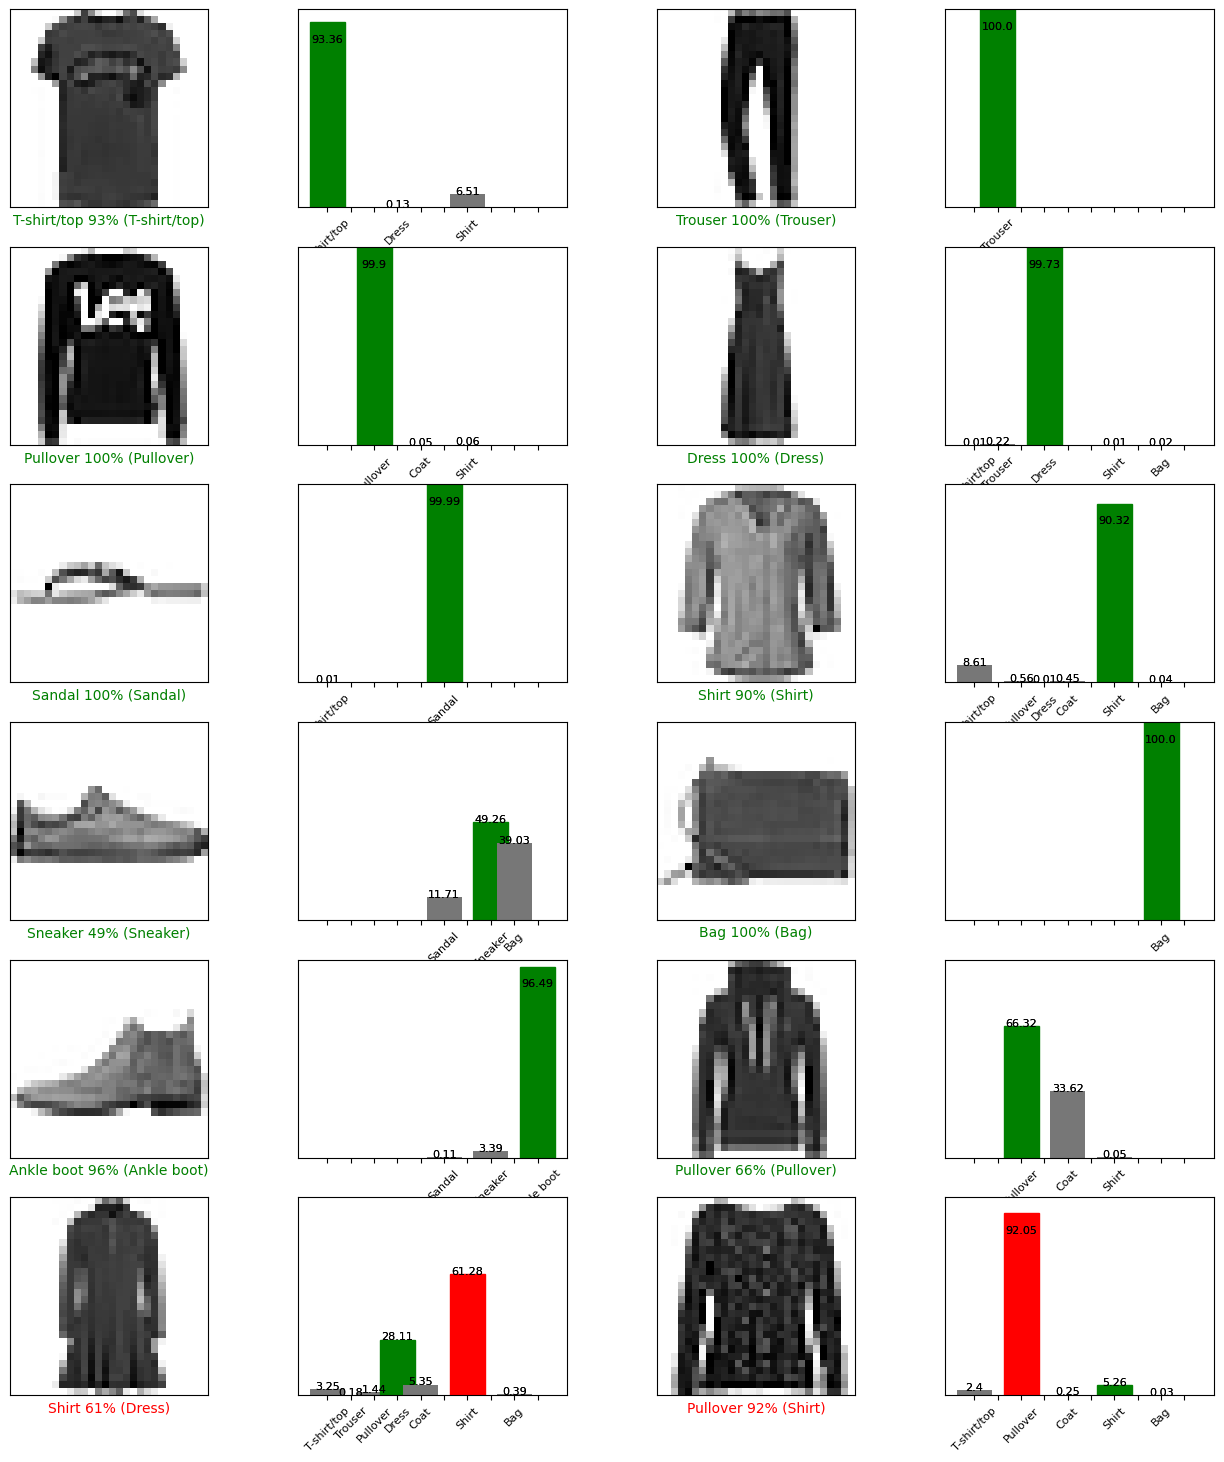

 
{'module': 'keras.optimizers.experimental', 'class_name': 'Nadam', 'config': {'name': 'Nadam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.0010000000474974513, 'beta_1': 0.7, 'beta_2': 0.99, 'epsilon': 1e-07}, 'registered_name': None}
4/4 [==============================] - 0s 4ms/step


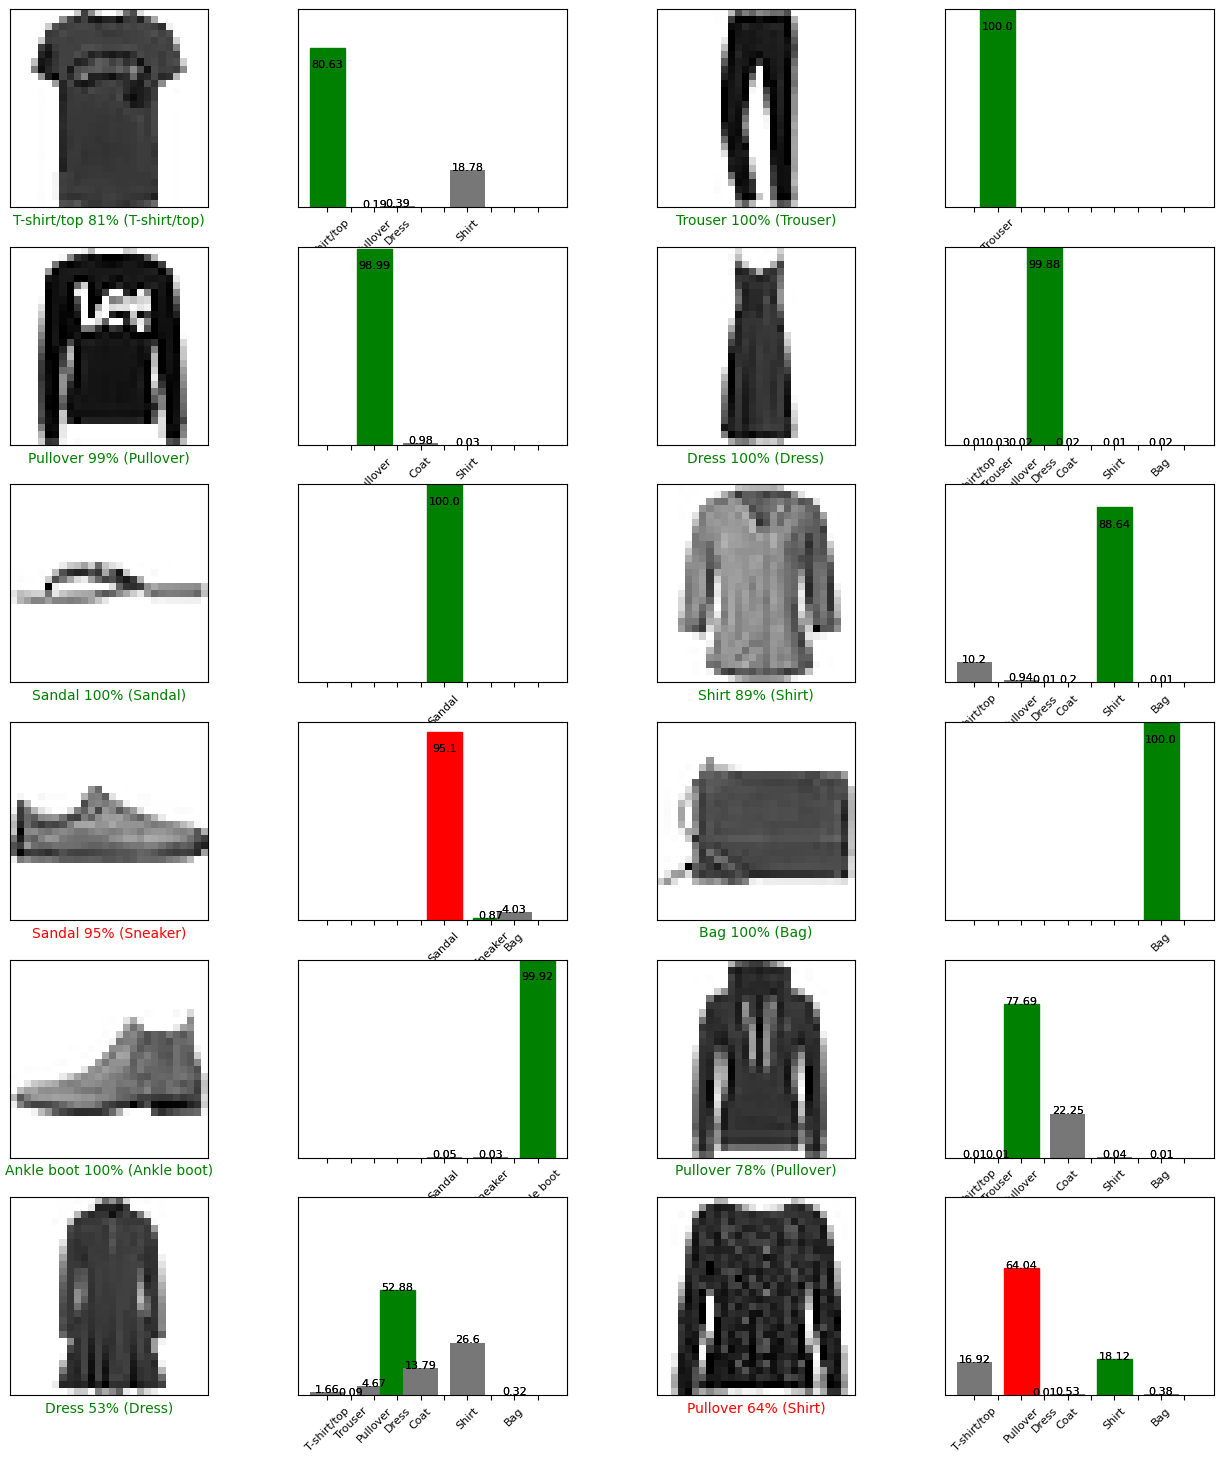

In [62]:
for current in best_models:
  cur_model = modelos[current[1]]
  optmizer_data = cur_model.get_compile_config()['optimizer']
  optimizer_config = optmizer_data['config']
  print(optmizer_data)
  predictions = cur_model.predict(x_test[:101])
  title = current[0]+" lr:" + str(round(optimizer_config['learning_rate'],4))
  if 'momentum' in optimizer_config:
    title+=" M: "+str(round(optimizer_config['momentum'],2))
  if 'nesterov' in optimizer_config:
    title+=" Nes: "+str(round(optimizer_config['nesterov'],2))
  if 'rho' in optimizer_config:
    title+=" Decay: "+str(round(optimizer_config['rho'],2))
  if'beta_1' in optimizer_config:
    title+=" B1: "+str(round(optimizer_config['beta_1'],2))
  if 'beta_2' in optimizer_config:
    title+=" B2: "+str(round(optimizer_config['beta_2'],2))

  plot_multiple_evaluation(x_test, y_test, predictions)

  print(" ")

El siguiente fragmento nos permite detectar donde falla cada modelo en las 100 primeras predicciones.

In [58]:

for current in best_models:
  cur_model = modelos[current[1]]
  optmizer_data = cur_model.get_compile_config()['optimizer']
  optimizer_config = optmizer_data['config']
  print(optmizer_data)
  predictions = cur_model.predict(x_test[:1401])
  for i in range(100):
    predicted_label = np.argmax(predictions[i])
    if predicted_label != y_test[i]:
      print(f"Printing case {i} with optimizer {current[0]}")
      fig = plt.figure(figsize=(6, 3))
      title = current[0]+" lr:" + str(round(optimizer_config['learning_rate'],4))
      if 'momentum' in optimizer_config:
        title+=" M: "+str(round(optimizer_config['momentum'],2))
      if 'nesterov' in optimizer_config:
        title+=" Nes: "+str(round(optimizer_config['nesterov'],2))
      if 'rho' in optimizer_config:
        title+=" Decay: "+str(round(optimizer_config['rho'],2))
      if'beta_1' in optimizer_config:
        title+=" B1: "+str(round(optimizer_config['beta_1'],2))
      if 'beta_2' in optimizer_config:
        title+=" B2: "+str(round(optimizer_config['beta_2'],2))
      fig.suptitle(title + " ")
      #plot_multiple_evaluation(x_test, y_test, predictions,title)
      plt.subplot(1, 2, 1)
      plot_image(i, predictions, y_test, x_test)
      plt.subplot(1, 2, 2)
      plot_bars_graph(i, predictions,  y_test)


Output hidden; open in https://colab.research.google.com to view.